In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Clustering
from importlib import reload
reload(Clustering)
from Clustering import *
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
from cpclasses import save_plot

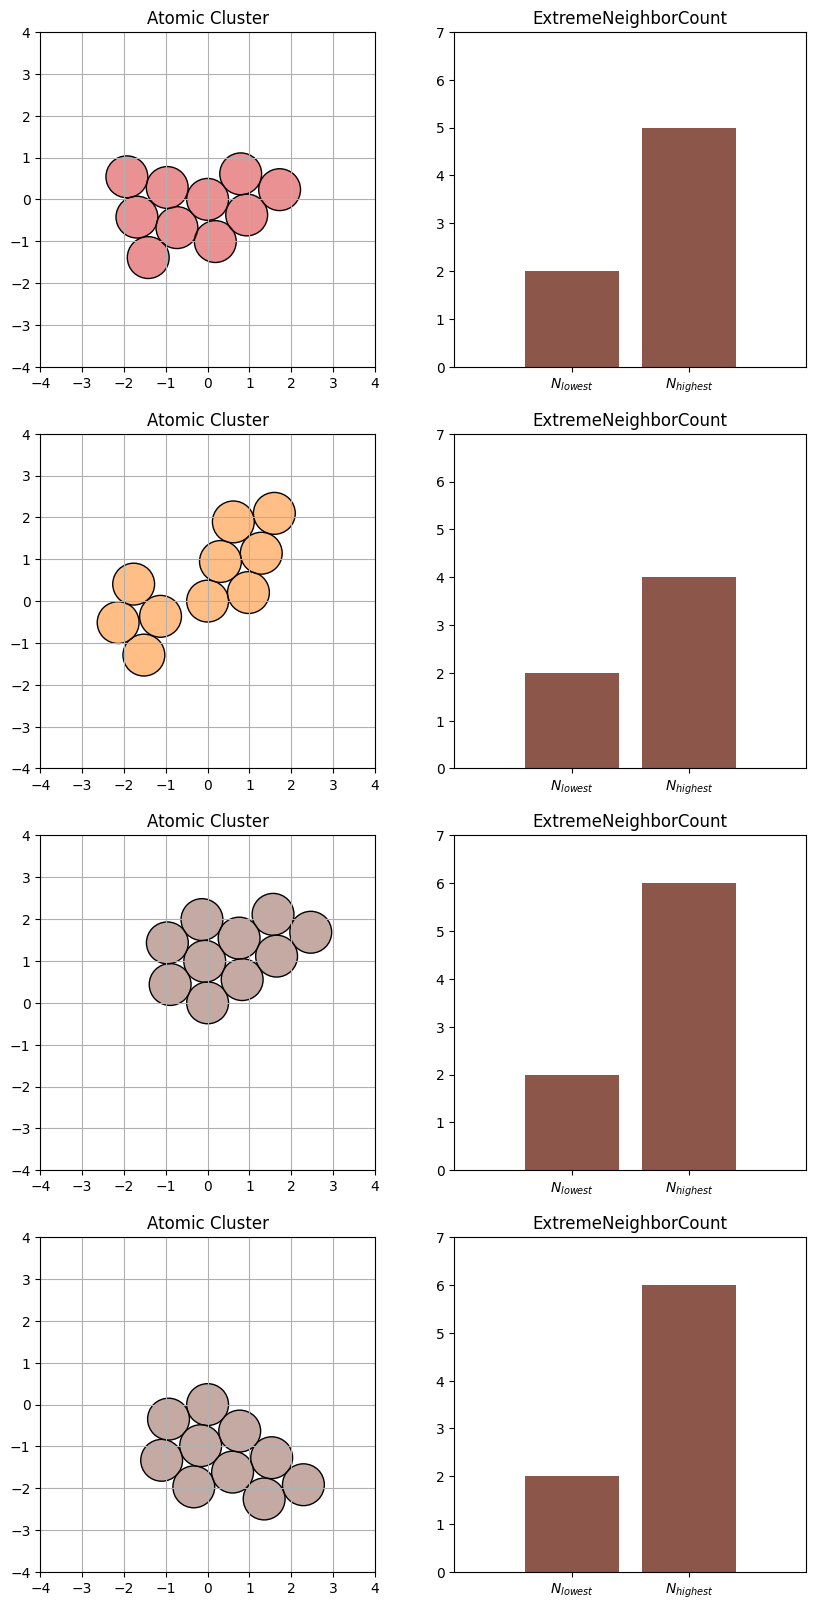

In [2]:


N_clusters = 4
clusters = [AtomicCluster(pos, descriptor_methods=ExtremeNeighborCount) for pos in positions]
fig, axs = plt.subplots(N_clusters,2, figsize=(10,N_clusters*5))

for ax, cluster in zip(axs, clusters):
    cluster.draw(ax[0])
    cluster.draw_descriptor(ax[1])

    #ax[1].set_aspect('equal')
    ax[1].set_xlim(-1, 2)
    ax[0].grid()


#save_plot(fig, 'ExtremeNeighborCount.png', bbox_inches='tight')

[Text(0.5, 0, '$N_{lowest}$'), Text(0, 0.5, '$N_{highest}$')]

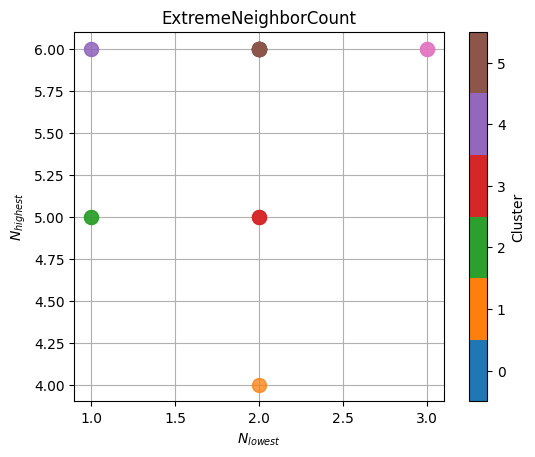

In [3]:
fig, ax = plt.subplots()
for cluster in clusters:
    element = cluster.draw_cluster(ax)
    ax.set_aspect('equal')
ax.grid()
colors = [f'C{i}' for i in range(6)]

#make a colorbar from the given colors:
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
cmap = ListedColormap(colors)
sm = ScalarMappable(cmap=cmap)
sm.set_array([])
fig.colorbar(sm, label='Cluster', ax=ax, ticks=[0,1,2,3,4,5], values=[0,1,2,3,4,5])

ax.set(xlabel=r'$N_{lowest}$', ylabel=r'$N_{highest}$')
#save_plot(fig, 'ExtremeNeighborCount_cluster.png', bbox_inches='tight')